In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
print("Total No. of Rows are:",df.shape[0])
print("Total No. of Columns are:",df.shape[1])
df

Total No. of Rows are: 907
Total No. of Columns are: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

This dataset contains 907 entries in 27 columns in two type (float64 and object) of data in 191.4+ KB memory.

In [6]:
df.duplicated().sum()

0

There is no duplicate values in this dataset.

Before moving towards graphical analysis we will drop the empty columns.

In [8]:
df.drop(columns=["other_fuel2","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [9]:
# Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
owner                              563       62.072767
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
year_of_capacity_data              388       42.778390
commissioning_year                 374       41.234840
longitude                           46        5.071665
latitude                            46        5.071665
geolocation_source                  19        2.094818
primary_fuel                         0        0.000000
country_long                         0        0.000000
source                               0        0.000000
url                                  0        0.000000
capacity_m

### Missing value imputation

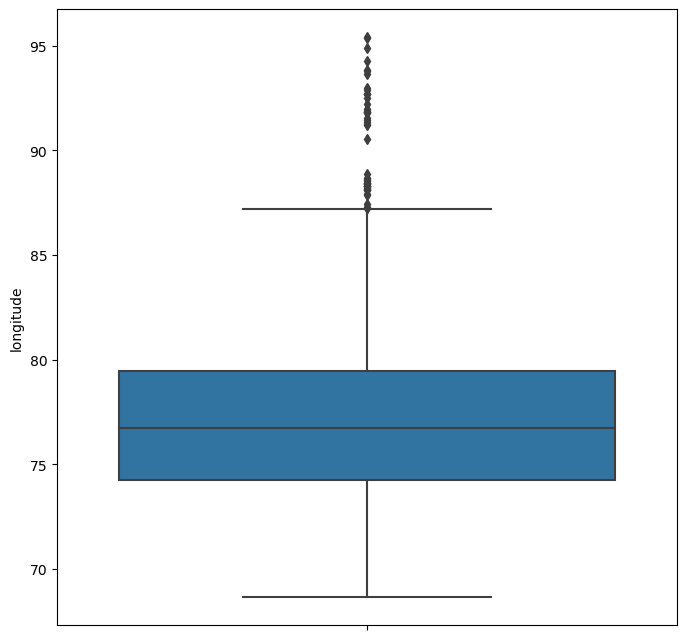

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(y='longitude',data=df)
plt.show()

Outliers are present in longitude. we can impute median.

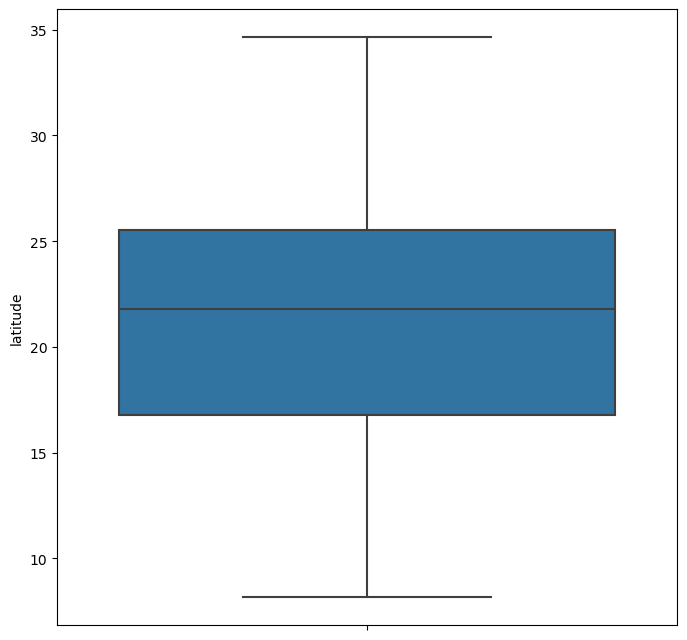

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(y='latitude',data=df)
plt.show()

Outliers are absent so can impute with mean.

As geolocation is Categoricaldata so can impute it with mode.

In [12]:
df['geolocation_source']= df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['longitude']= df['longitude'].fillna(df['longitude'].median())
df['latitude']= df['latitude'].fillna(df['latitude'].mean())

In [13]:
# Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
owner                              563       62.072767
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
year_of_capacity_data              388       42.778390
commissioning_year                 374       41.234840
primary_fuel                         0        0.000000
country_long                         0        0.000000
source                               0        0.000000
url                                  0        0.000000
geolocation_source                   0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
capacity_m

As we have fulfil the missing values of those columns, so we will move towards statistical matrix.

## Statistical Matrix

In [17]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,533.000000,519.0,404.000000,428.000000,440.000000,446.000000,453.000000
mean,326.223755,21.197918,77.427103,1997.078799,2019.0,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215
std,590.085456,6.079148,4.815073,17.119477,0.0,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,2019.0,219.417762,180.793688,186.152062,178.397305,196.054800
50%,59.200000,21.281800,76.719500,2001.000000,2019.0,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.176450,79.206100,2012.000000,2019.0,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- As year of capacity data is same throughout the column, so we can drop it.
- In generation_gwh_2014 to 2018 mean is greater than median which means data is skew in nature.
- Huge difference between 75% and max.
- Minimum latitude of power plant is 8.1689 and max. is 34.649 where logitudnal is 68.6447 to 95.408.

In [19]:
df.drop(columns=['year_of_capacity_data'],axis=1,inplace=True)

We have two different Target feature for regression and classification model. LetStart exploring both Target Feature.

- Before moving towards Regression Target feature we have to check the minimum and maximum capacity of powerplant.

## Regression Target Feature- Capacity

In [21]:
print("Minimum Capacity of Power Plant:",df.capacity_mw.min())
print("Maximum Capacity of Power Plant:",df.capacity_mw.max())

Minimum Capacity of Power Plant: 0.0
Maximum Capacity of Power Plant: 4760.0


In [22]:
df.loc[df.capacity_mw==0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,IND,India,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Tata BP Solar India Limited,http://www.tatabpsolar.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.loc[df.capacity_mw==4760]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,IND,India,VINDH_CHAL STPS,IND0000503,4760.0,24.0983,82.6719,Coal,Oil,2002.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


- Smallest Powerplant is Tata BP - Electronics City Solar Panel Plant with capacity_mw 0.
- Biggest Powerplant is VINDH_CHAL STPS with capacity_mw 4760. As its name describes it is Thermal Power plant and its primary fuel is coal and alternate fuel is oil.

<Axes: xlabel='capacity_mw'>

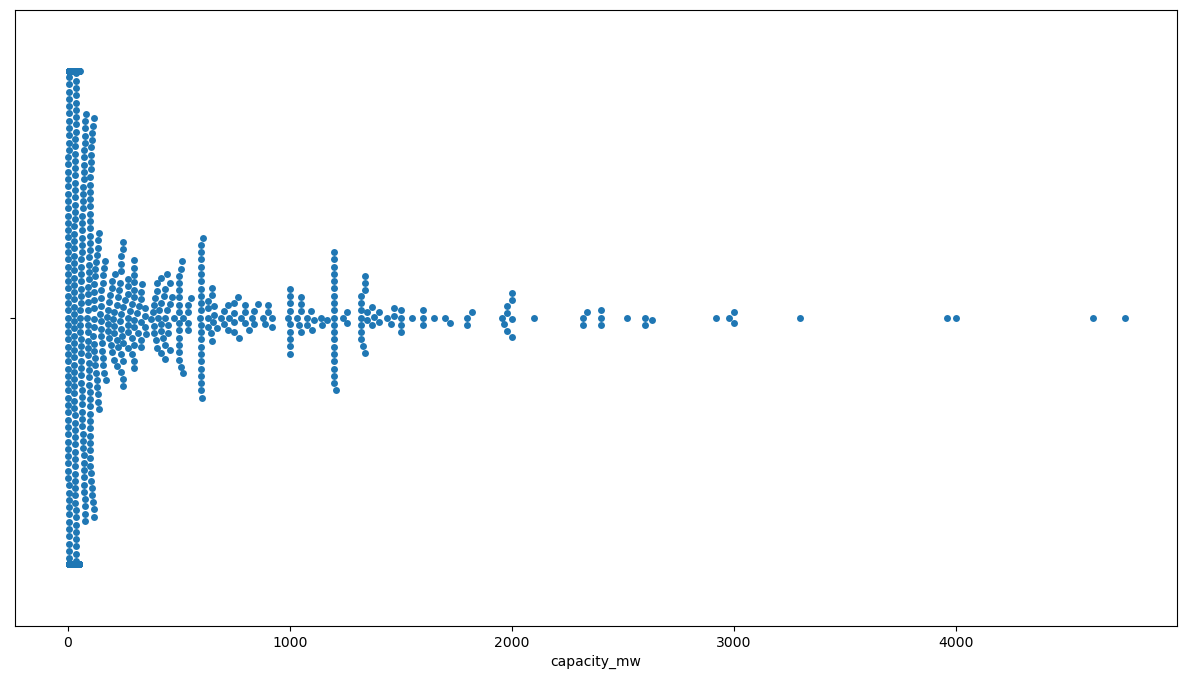

In [24]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='capacity_mw',data=df)

Above plot shows that there are no. of Power plants having moore than 1500MW. So, now we will confirm that fact.

In [25]:
df.loc[df.capacity_mw>1500].shape

(39, 20)

We have 20 power plants having capacity of morethan 1500MW.

In [29]:
# Checking Cpacity according to Primary fuel
pd.crosstab(df['capacity_mw'],df['primary_fuel'],margins=True).T

capacity_mw,0.0,1.0,1.5,1.7,1.8,2.0,2.1,2.25,2.4,2.5,...,2630.0,2920.0,2980.0,3000.0,3300.0,3960.0,4000.0,4620.0,4760.0,All
primary_fuel,,,,,,,,,,,,,,,,,,,,,
Biomass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
Coal,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,1,258
Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69
Hydro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,251
Nuclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
Oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
Solar,1,17,0,0,1,6,2,0,0,1,...,0,0,0,0,0,0,0,0,0,127
Wind,0,1,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,123
All,1,18,3,2,1,6,2,1,1,1,...,1,1,1,2,1,1,1,1,1,907


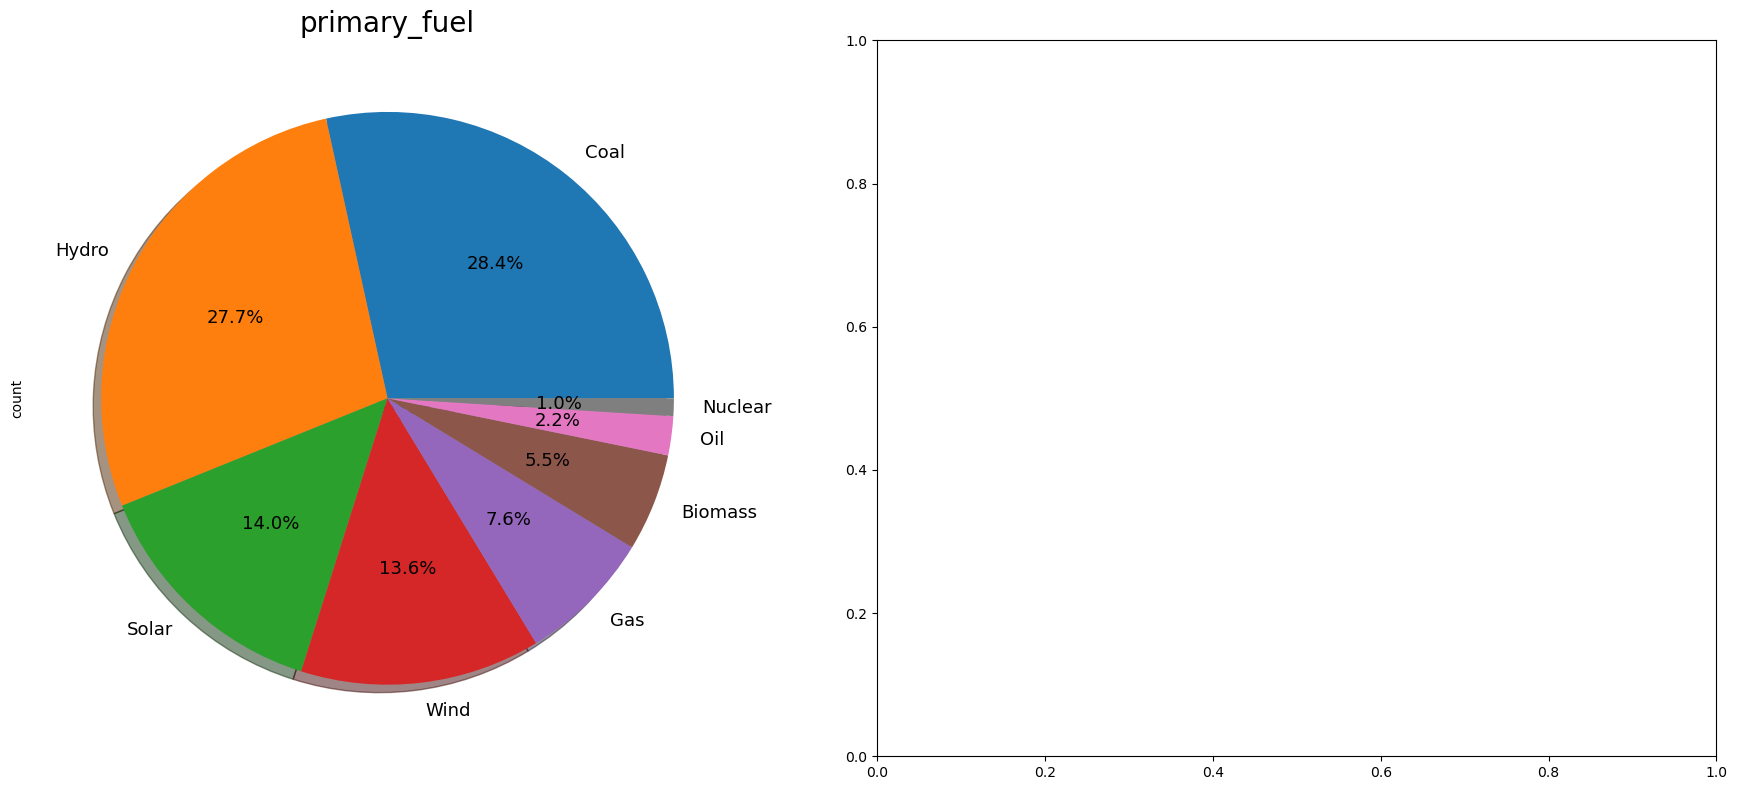

In [39]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20)

plt.show()

In [40]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

- Coal is used as primary fuel in maximum power plant followed by Hydro energy based power plant.
- There are only 9 nuclear based power plant which are usually build to possess high capacity.
- Now, we will check the total energy capacity of all power plants.

In [41]:
print("Total Power Generation of all power plant:",df['capacity_mw'].sum(),'MW')

Total Power Generation of all power plant: 295884.946 MW


In [42]:
# Checking Power Generation capacity based on sector
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Maximum is from coal and nuclear is more than (Solar, oil,Biomass and wind).

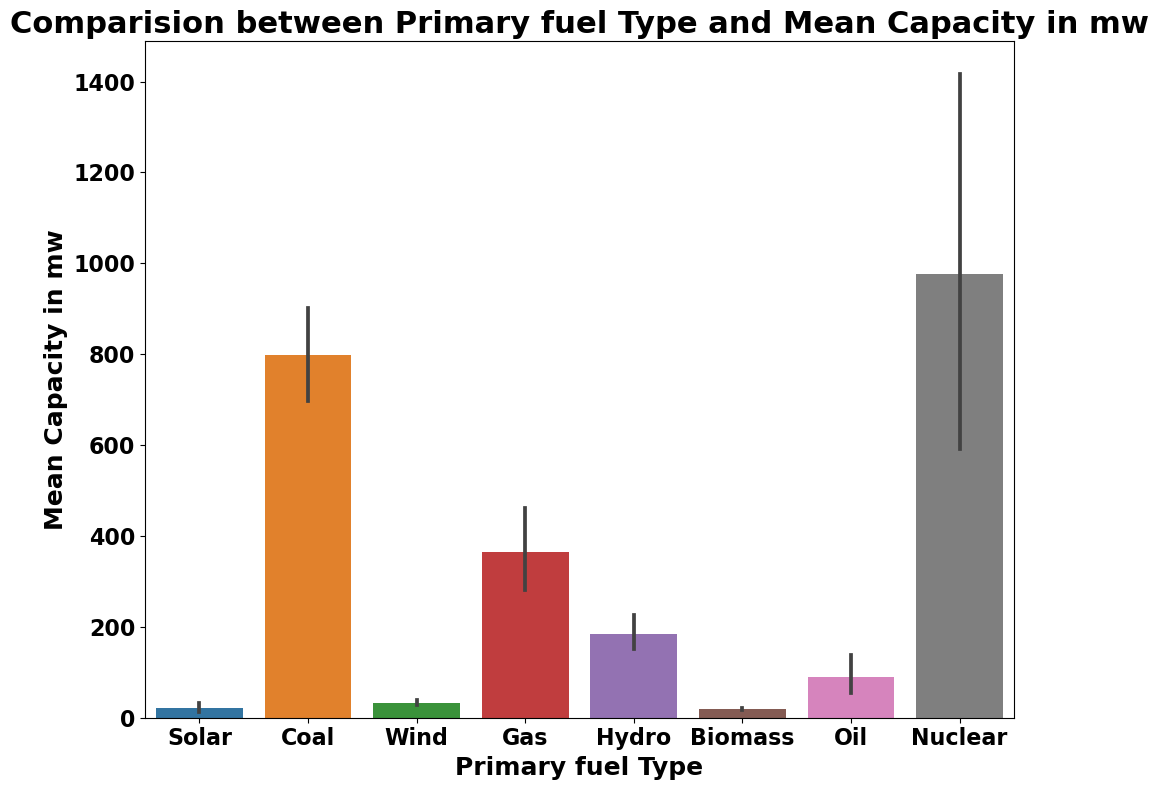

In [43]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=0)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

As Nuclear power plants are only 9 so their mean capacity is also higher.

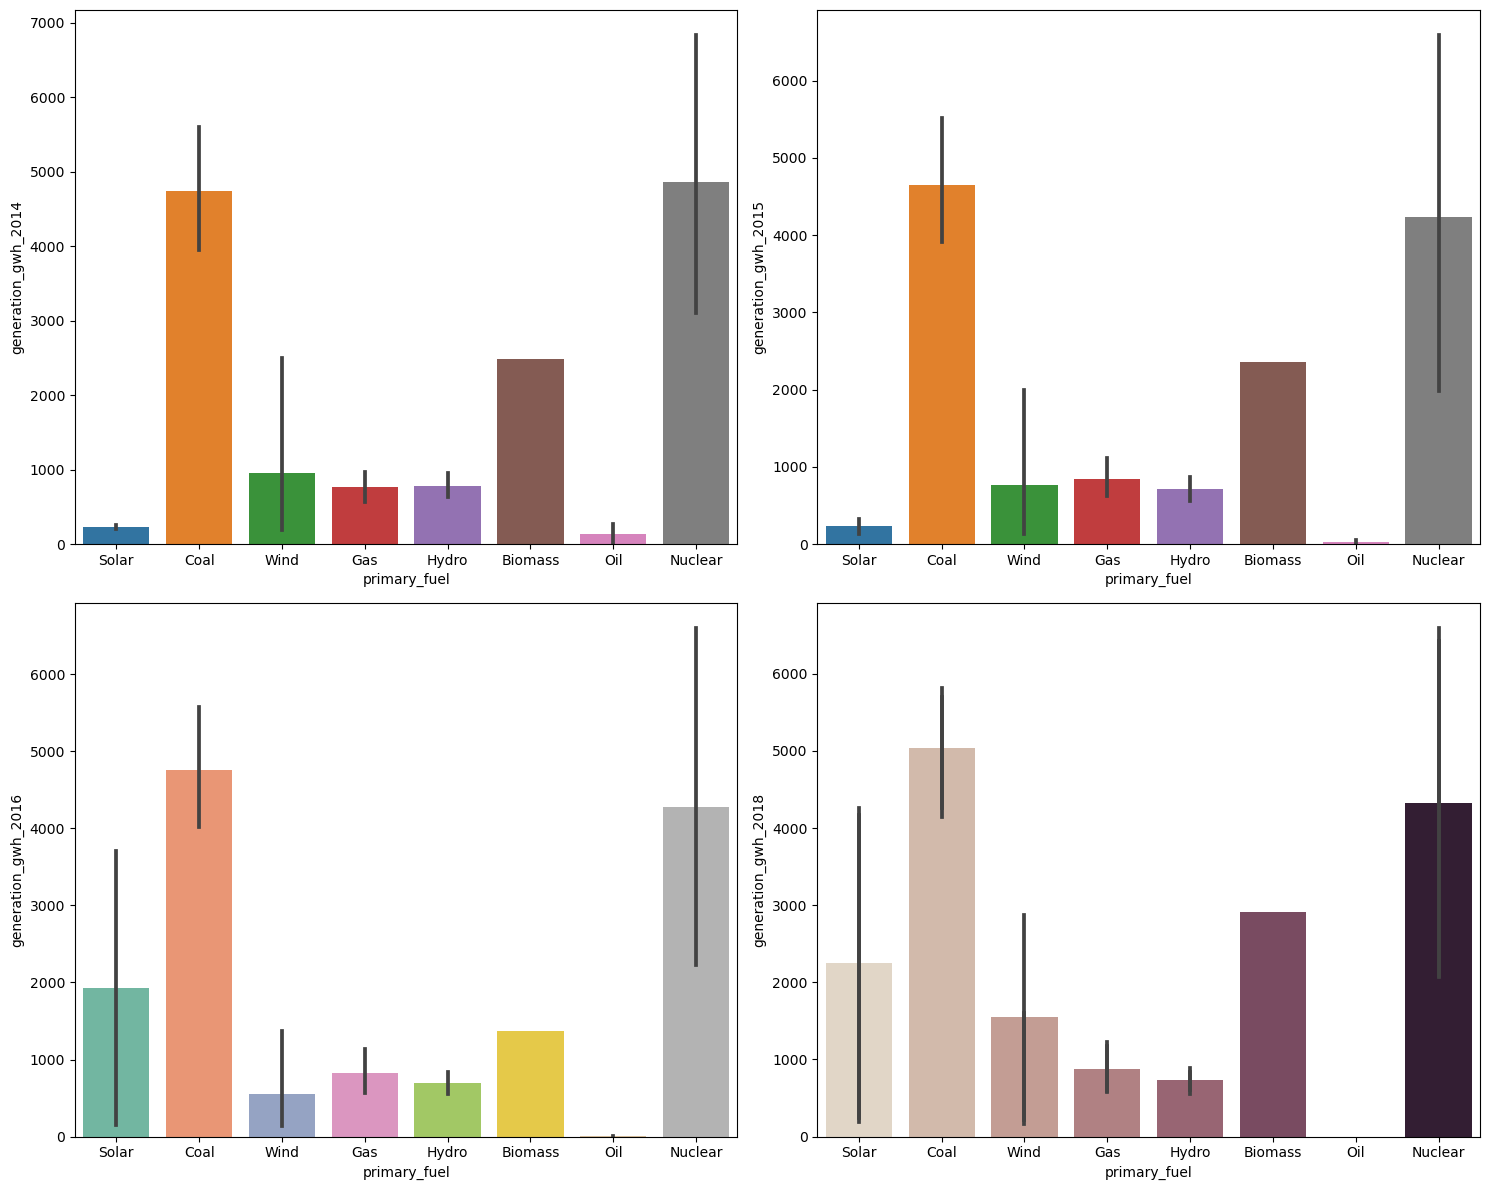

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")

# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

- Above graph shows that nuclear has high mean electric generation.
- Other fuel type have very less contribution to generate electricity except coal.

## Compare Location to Primary_fuel

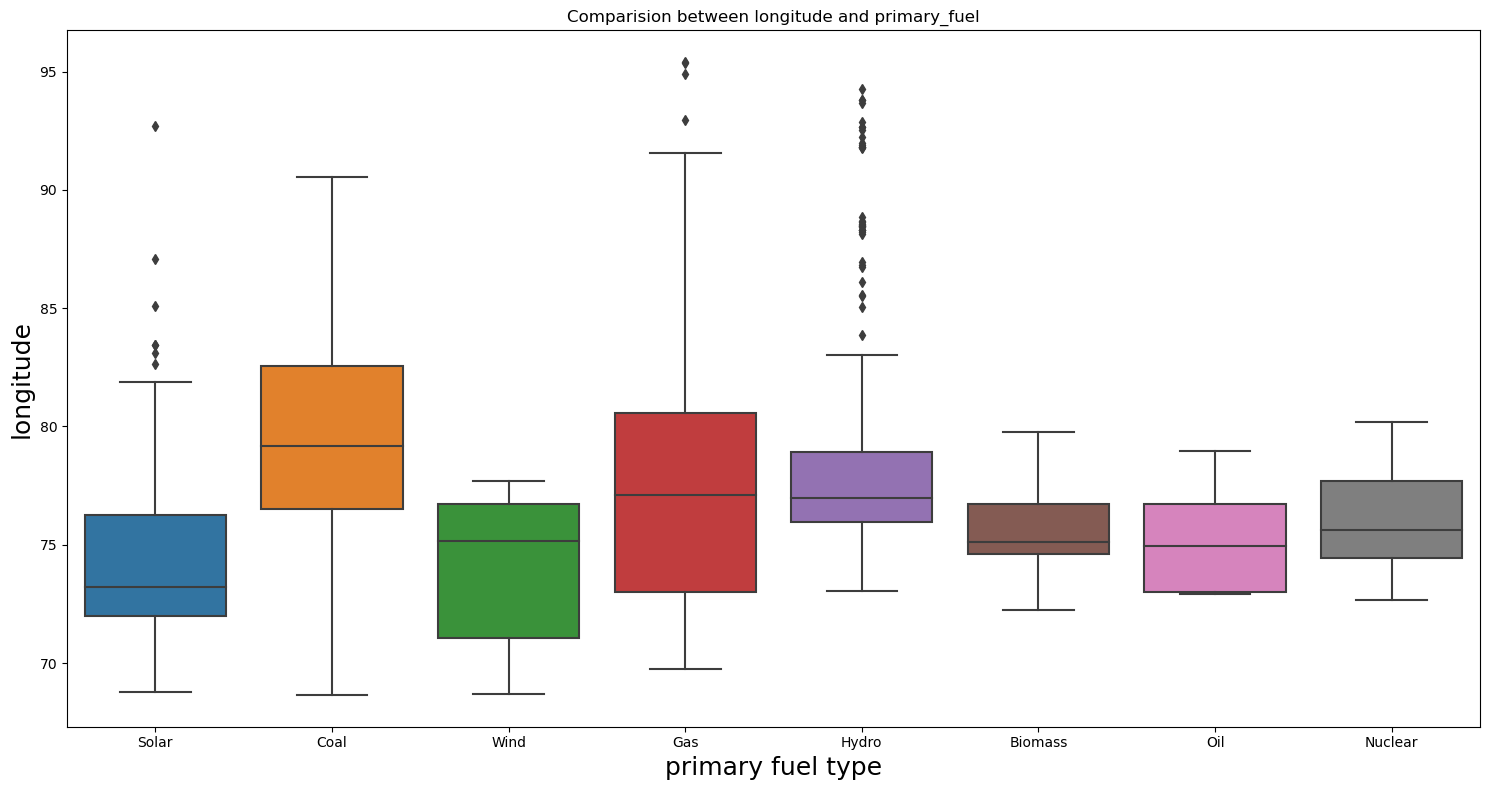

In [59]:
# Let's check how the primary_fuel is related to longitude of the power plant
plt.figure(figsize=(15,8))
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x = df['primary_fuel'], y = df["longitude"])
a.set_xlabel('primary fuel type',fontsize=18)
a.set_ylabel('longitude',fontsize=18)
plt.show()

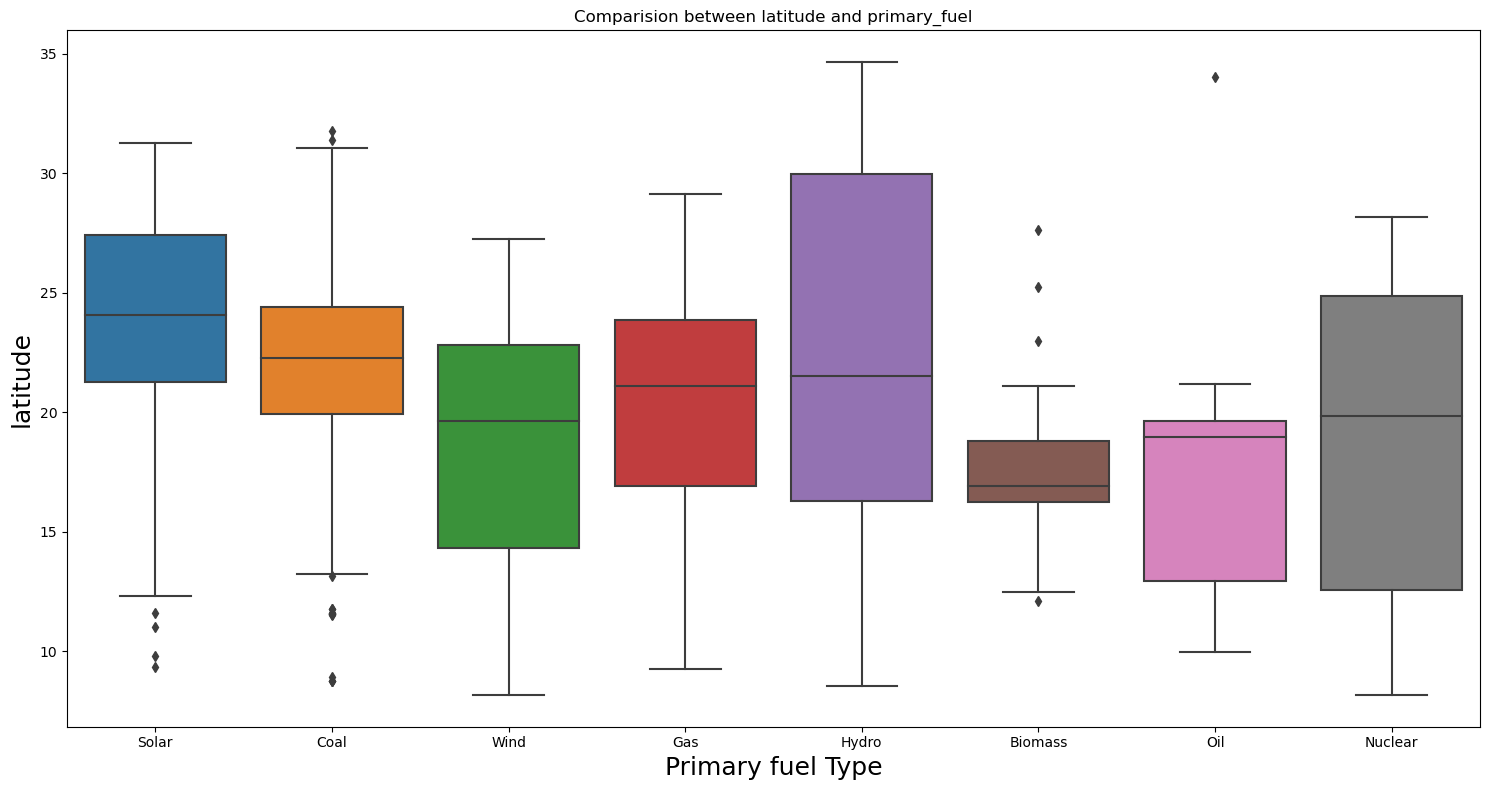

In [61]:
# Let's check how the primary_fuel is reated to latitude of the power plant
plt.figure(figsize=[15,8])
plt.title('Comparision between latitude and primary_fuel')
a = sns.boxplot(x = df['primary_fuel'],y = df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18)
a.set_ylabel('latitude',fontsize=18)
plt.show()

Location is important feature for power plant as they need more sunlight to generate electricity. Now, we will check Location to capacity.

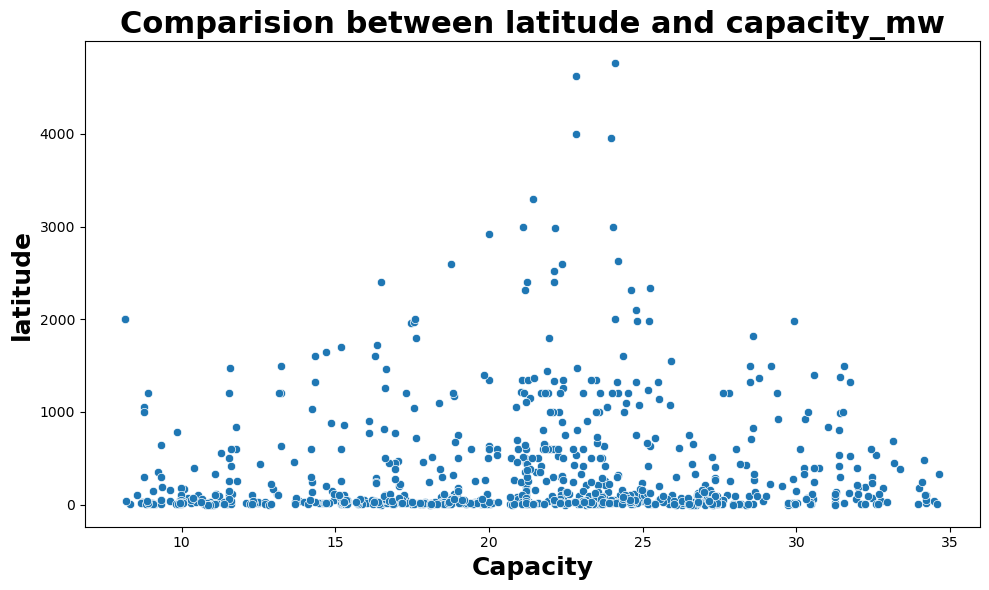

In [63]:
# Let's check how the capacity is related to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(x = df['latitude'],y = df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

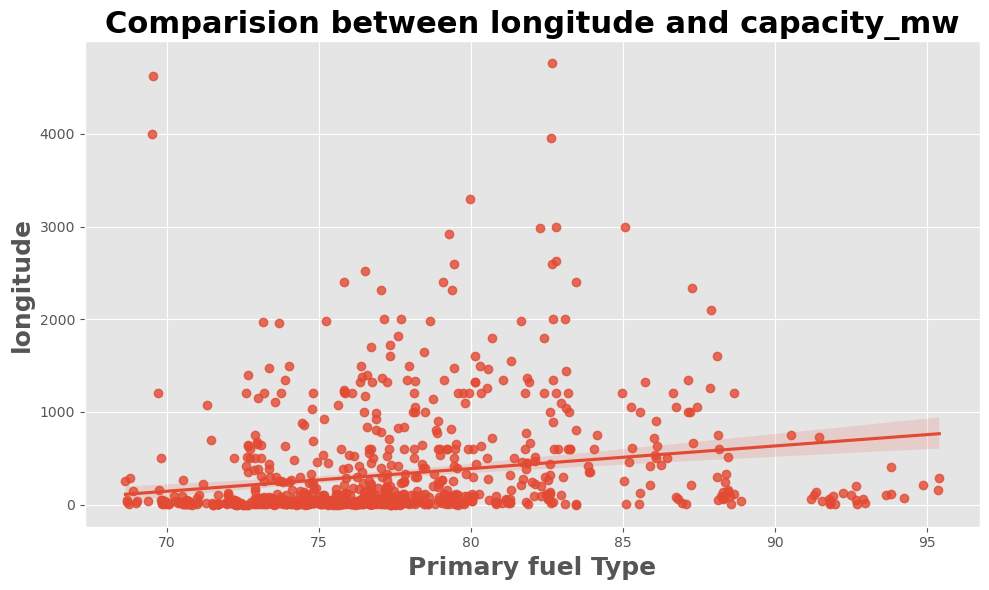

In [65]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(x = df['longitude'],y = df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

Nothing is clear from above plot.

Now, we will move toward commission age to primary fuel.

In [66]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [67]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [68]:
df.loc[df.Power_plant_age==91]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,IND,India,SIVASAMUNDRUM,IND0000418,42.0,12.3082,77.165,Hydro,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


SIVASAMUNDRUM of India is the oldest power plant and it is Hydro based plant with 42MW Capacity.

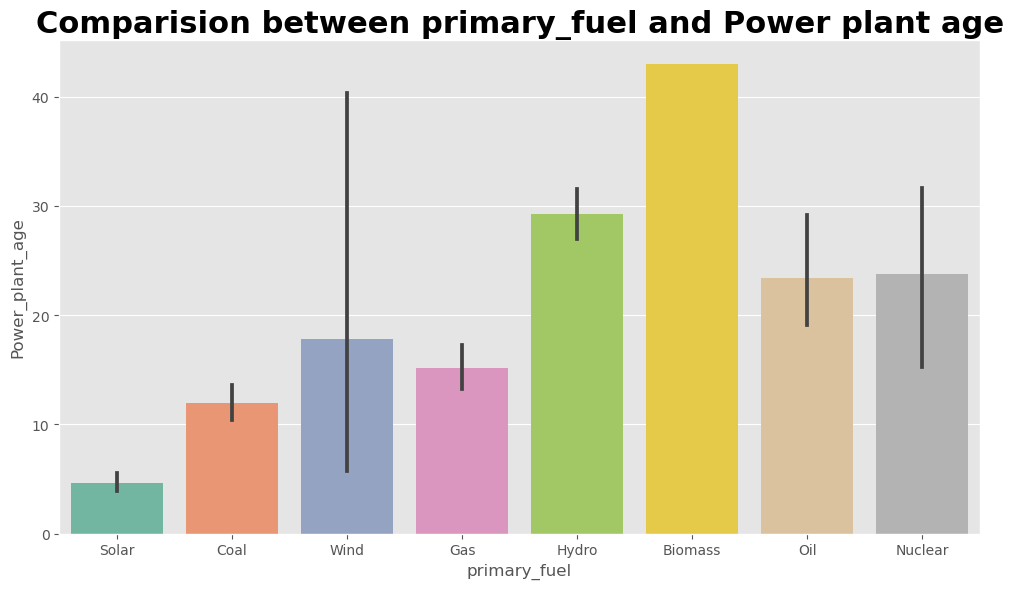

In [69]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

<Axes: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

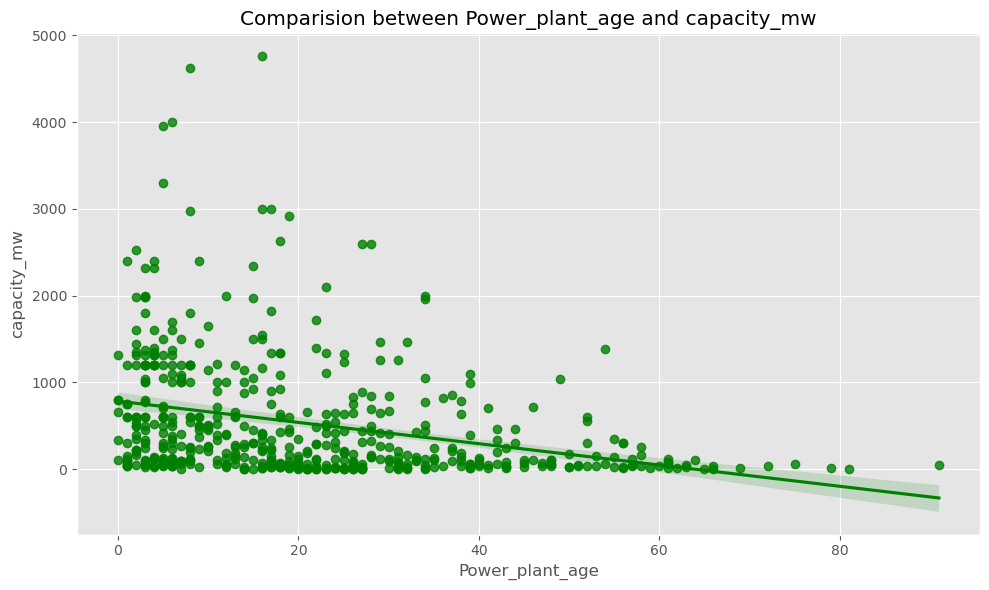

In [71]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x = df['Power_plant_age'],y = df['capacity_mw'],color = "g")

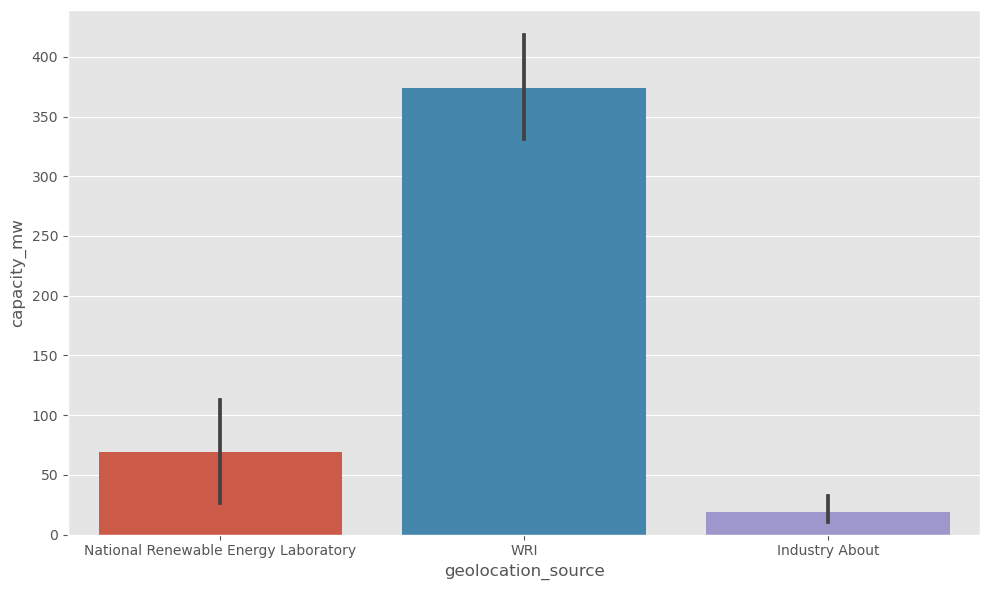

In [72]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

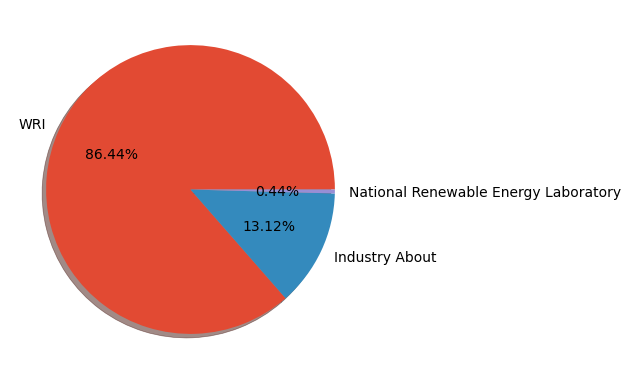

In [73]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

## Distribution of features

In [74]:
# Separating Numerical and Categorical Columns
# Checking for categoricalcolumns:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
    print("Categorical Columns:",categorical_col)
print("\n")

Categorical Columns: ['country']
Categorical Columns: ['country', 'country_long']
Categorical Columns: ['country', 'country_long', 'name']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url']
Categorical Columns: ['country', 'cou

In [75]:
# Checking for Numerical Columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
    print("Numerical Columns:",numerical_col)

Numerical Columns: []
Numerical Columns: []
Numerical Columns: []
Numerical Columns: []
Numerical Columns: ['capacity_mw']
Numerical Columns: ['capacity_mw', 'latitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generati

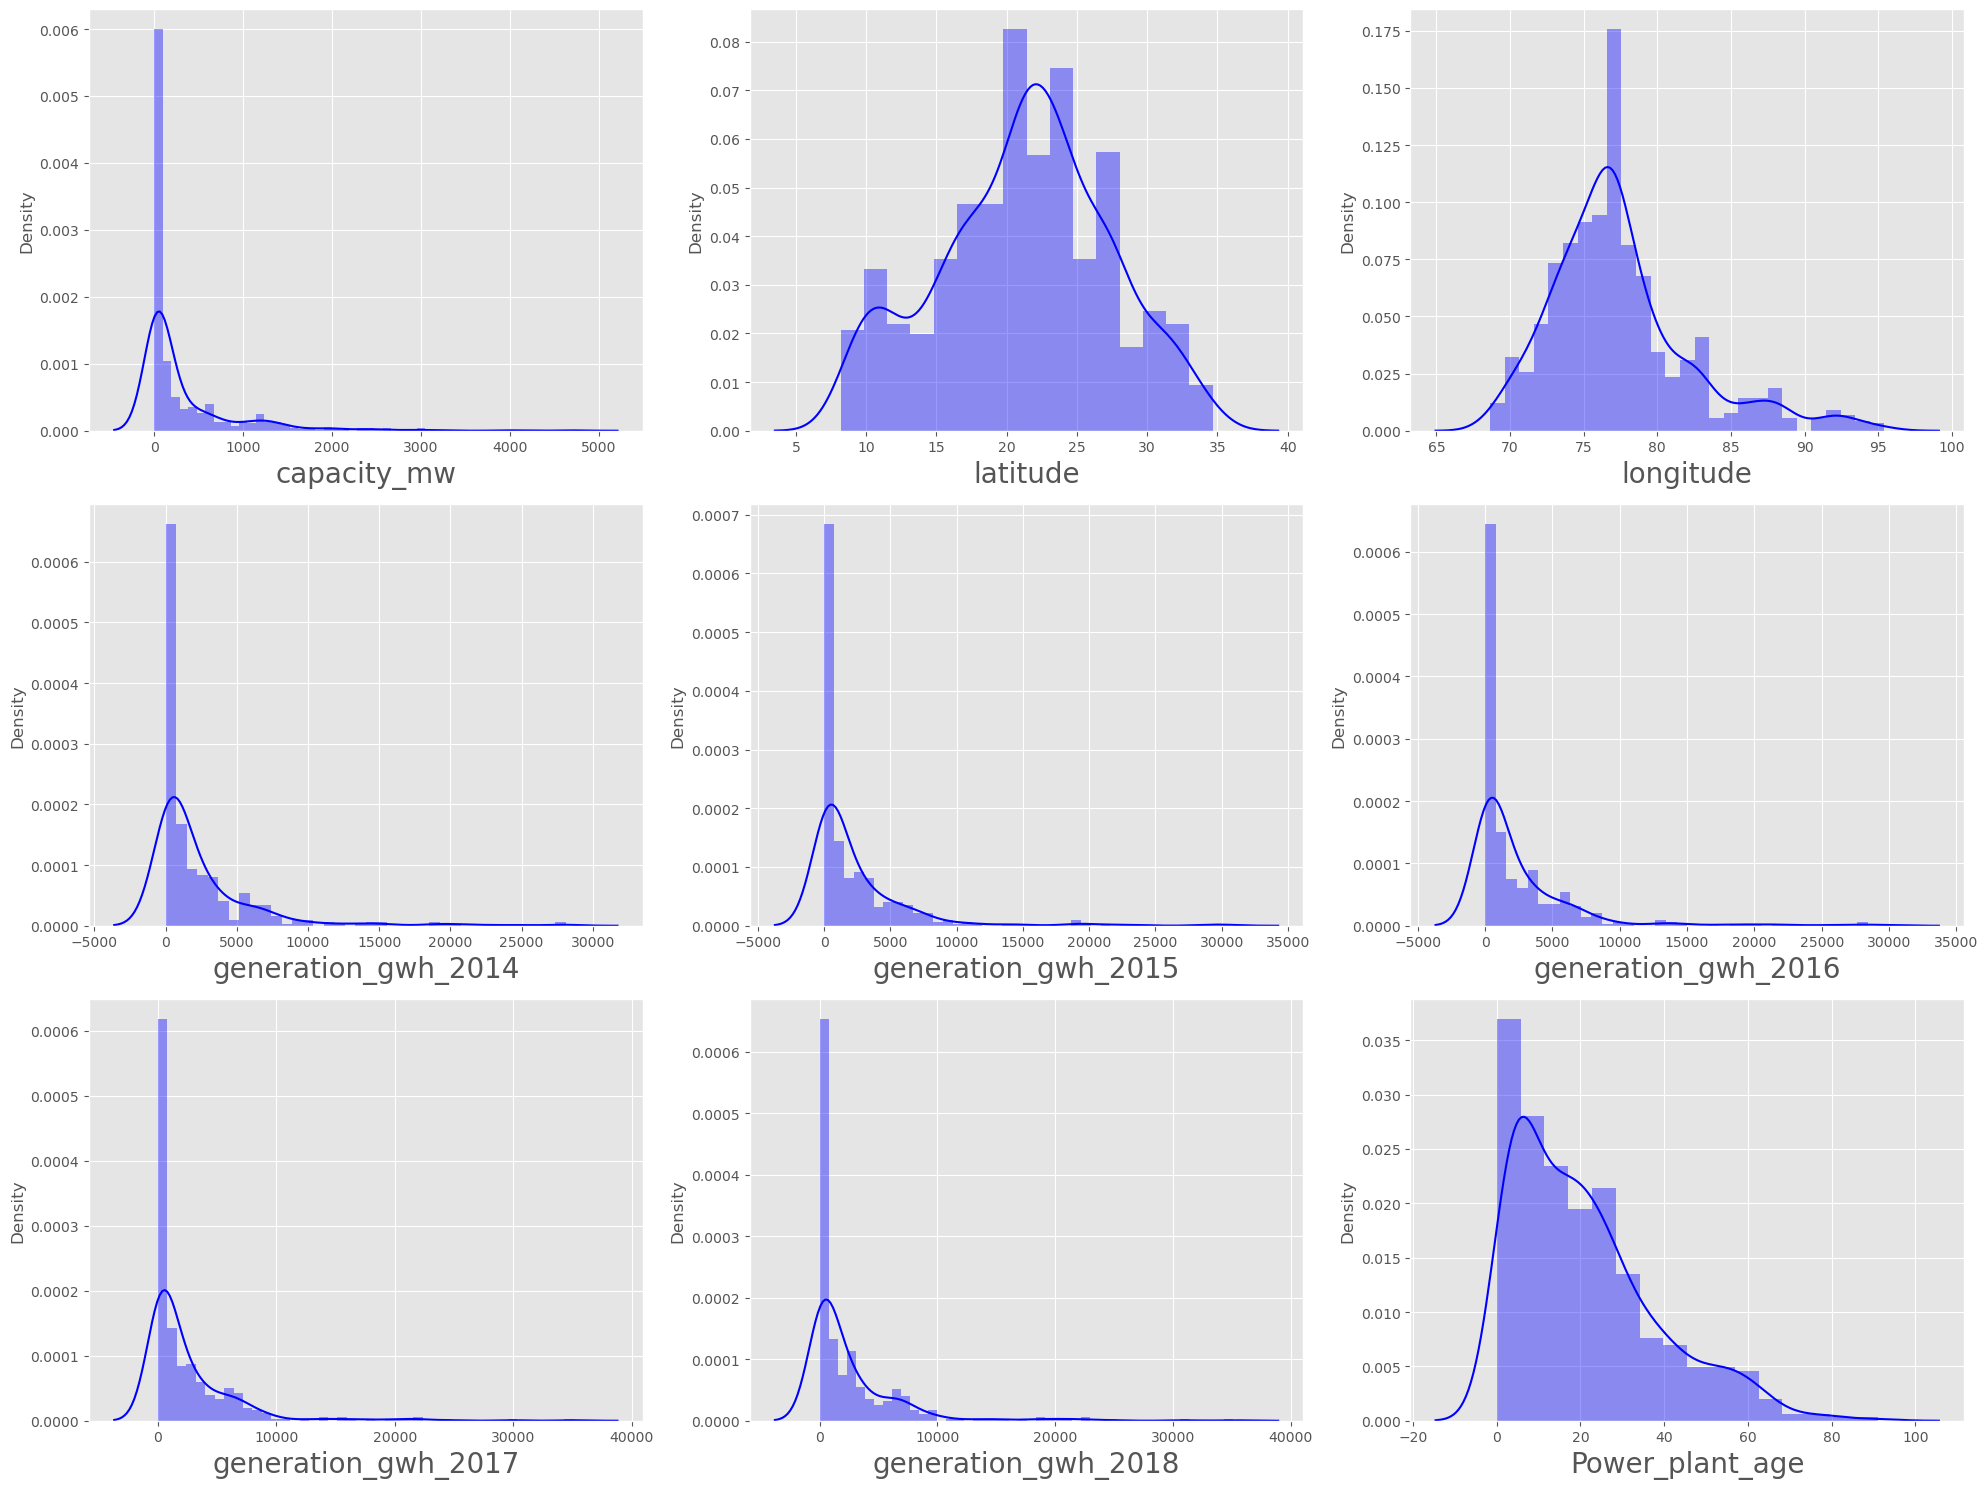

In [76]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Data seems skew in nature as mean is greater than median.

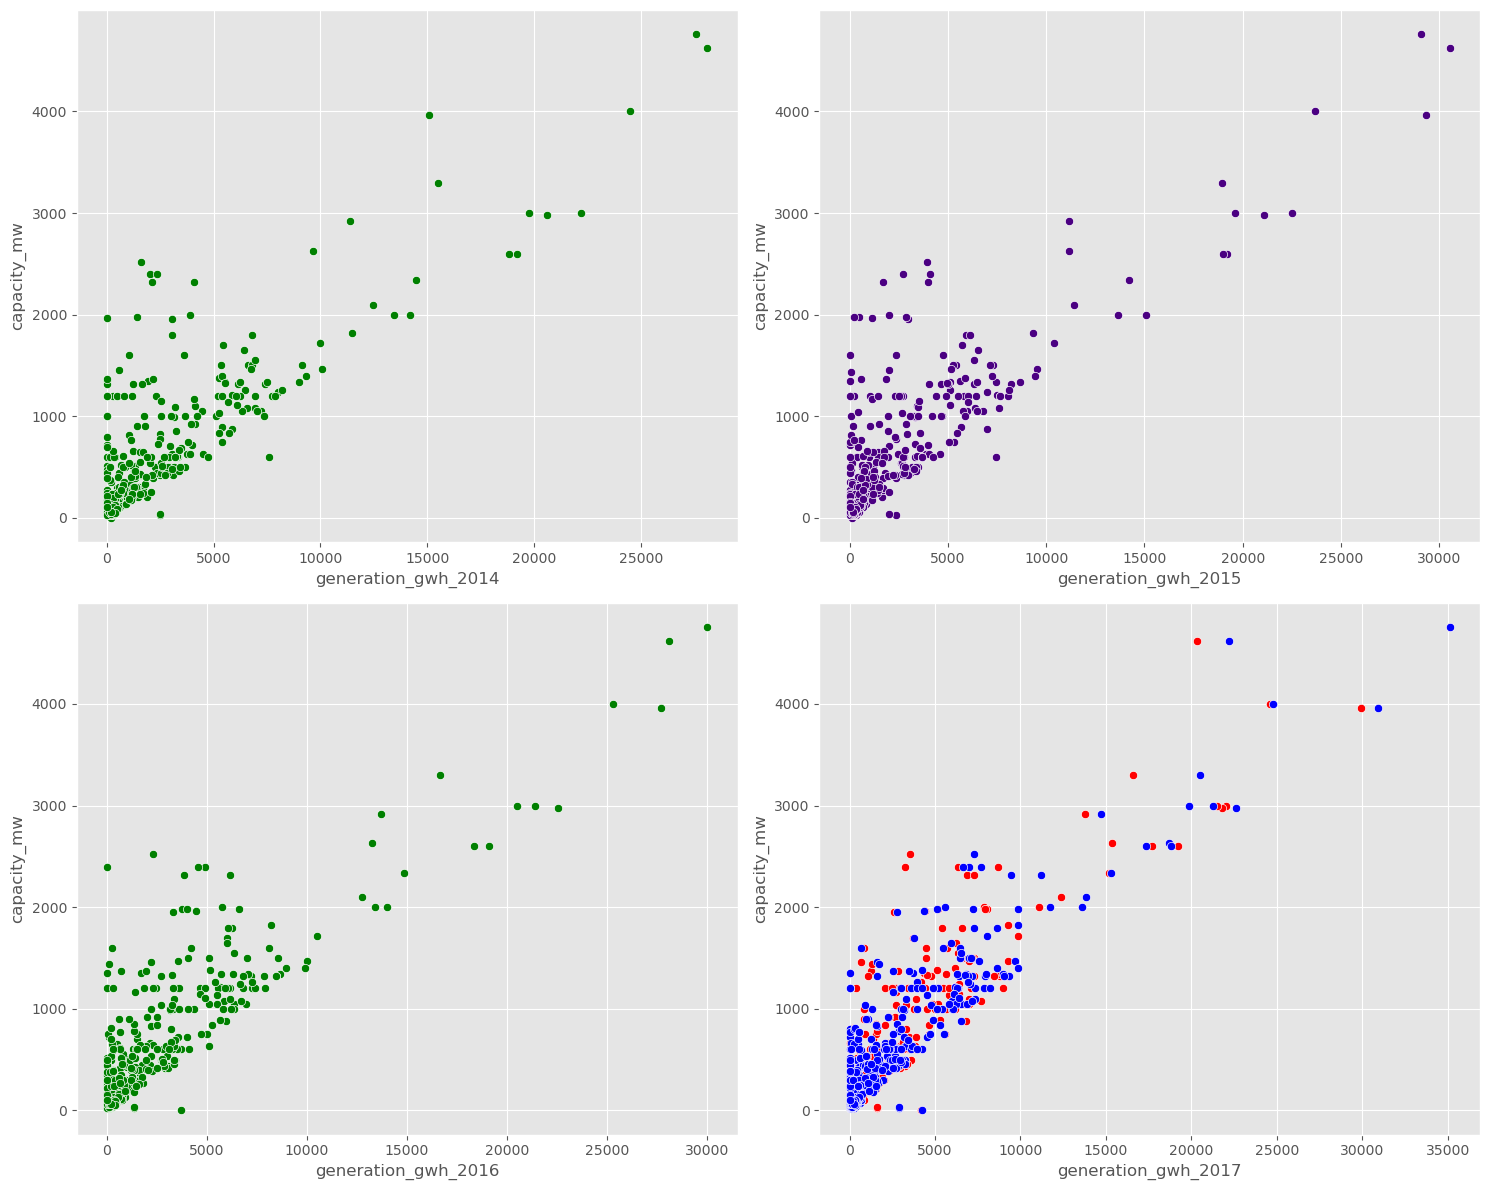

In [77]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")

## Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="b")
plt.show()

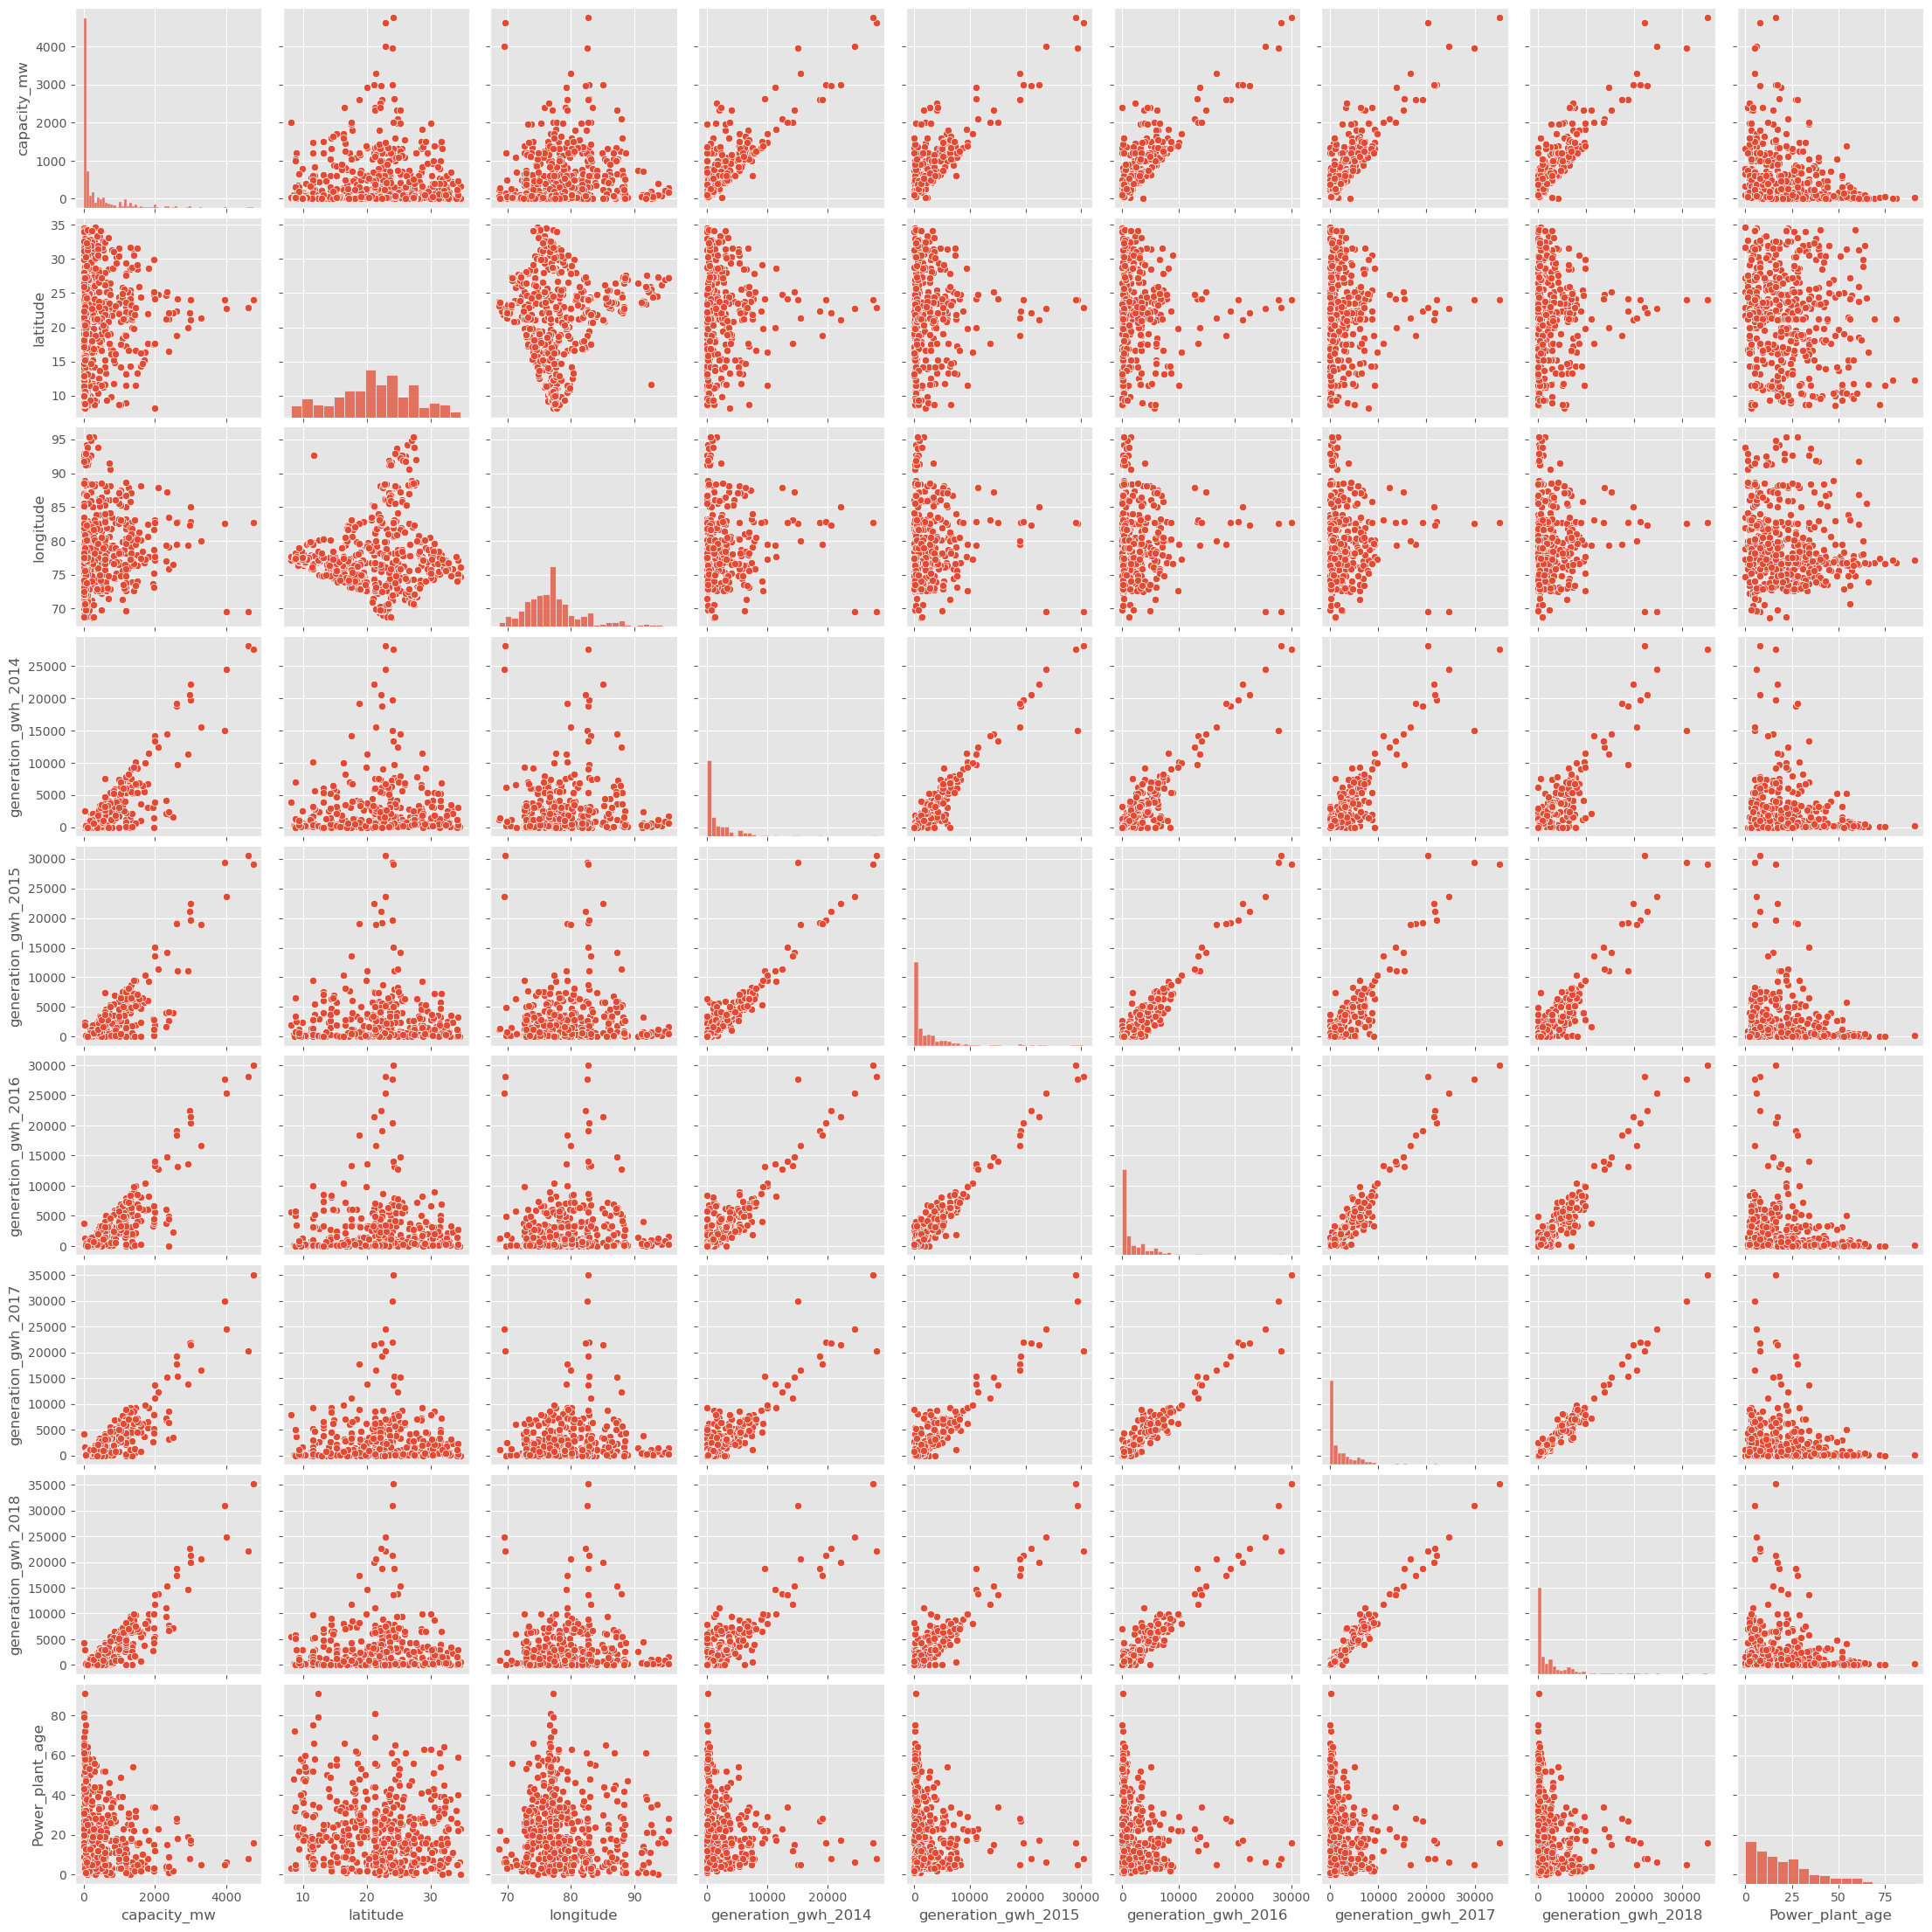

In [78]:
sns.pairplot(df)

- Most of features having linear relationship with each other.
- At diagonal histogram is present.
- Some of them shows the presence of outliers.

In [79]:
df.drop(columns=['name'],axis=1,inplace=True)

In [80]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [81]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.0,0.0,657.0,9.0,731.0,143.0,6.0,NaN,229.0,109.0,128.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0
1,0.0,0.0,519.0,177.0,594.0,234.0,1.0,NaN,258.0,174.0,173.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,853.0,121.0,420.0,8.0,7.0,NaN,2.0,21.0,205.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,200.0,547.0,805.0,2.0,NaN,NaN,22.0,58.0,2.0,158.0,198.0,198.0,177.0,175.0,14.0
4,0.0,0.0,1.0,340.0,423.0,701.0,1.0,2.0,NaN,22.0,58.0,2.0,274.0,351.0,360.0,339.0,375.0,3.0


## Outliers detection and removal

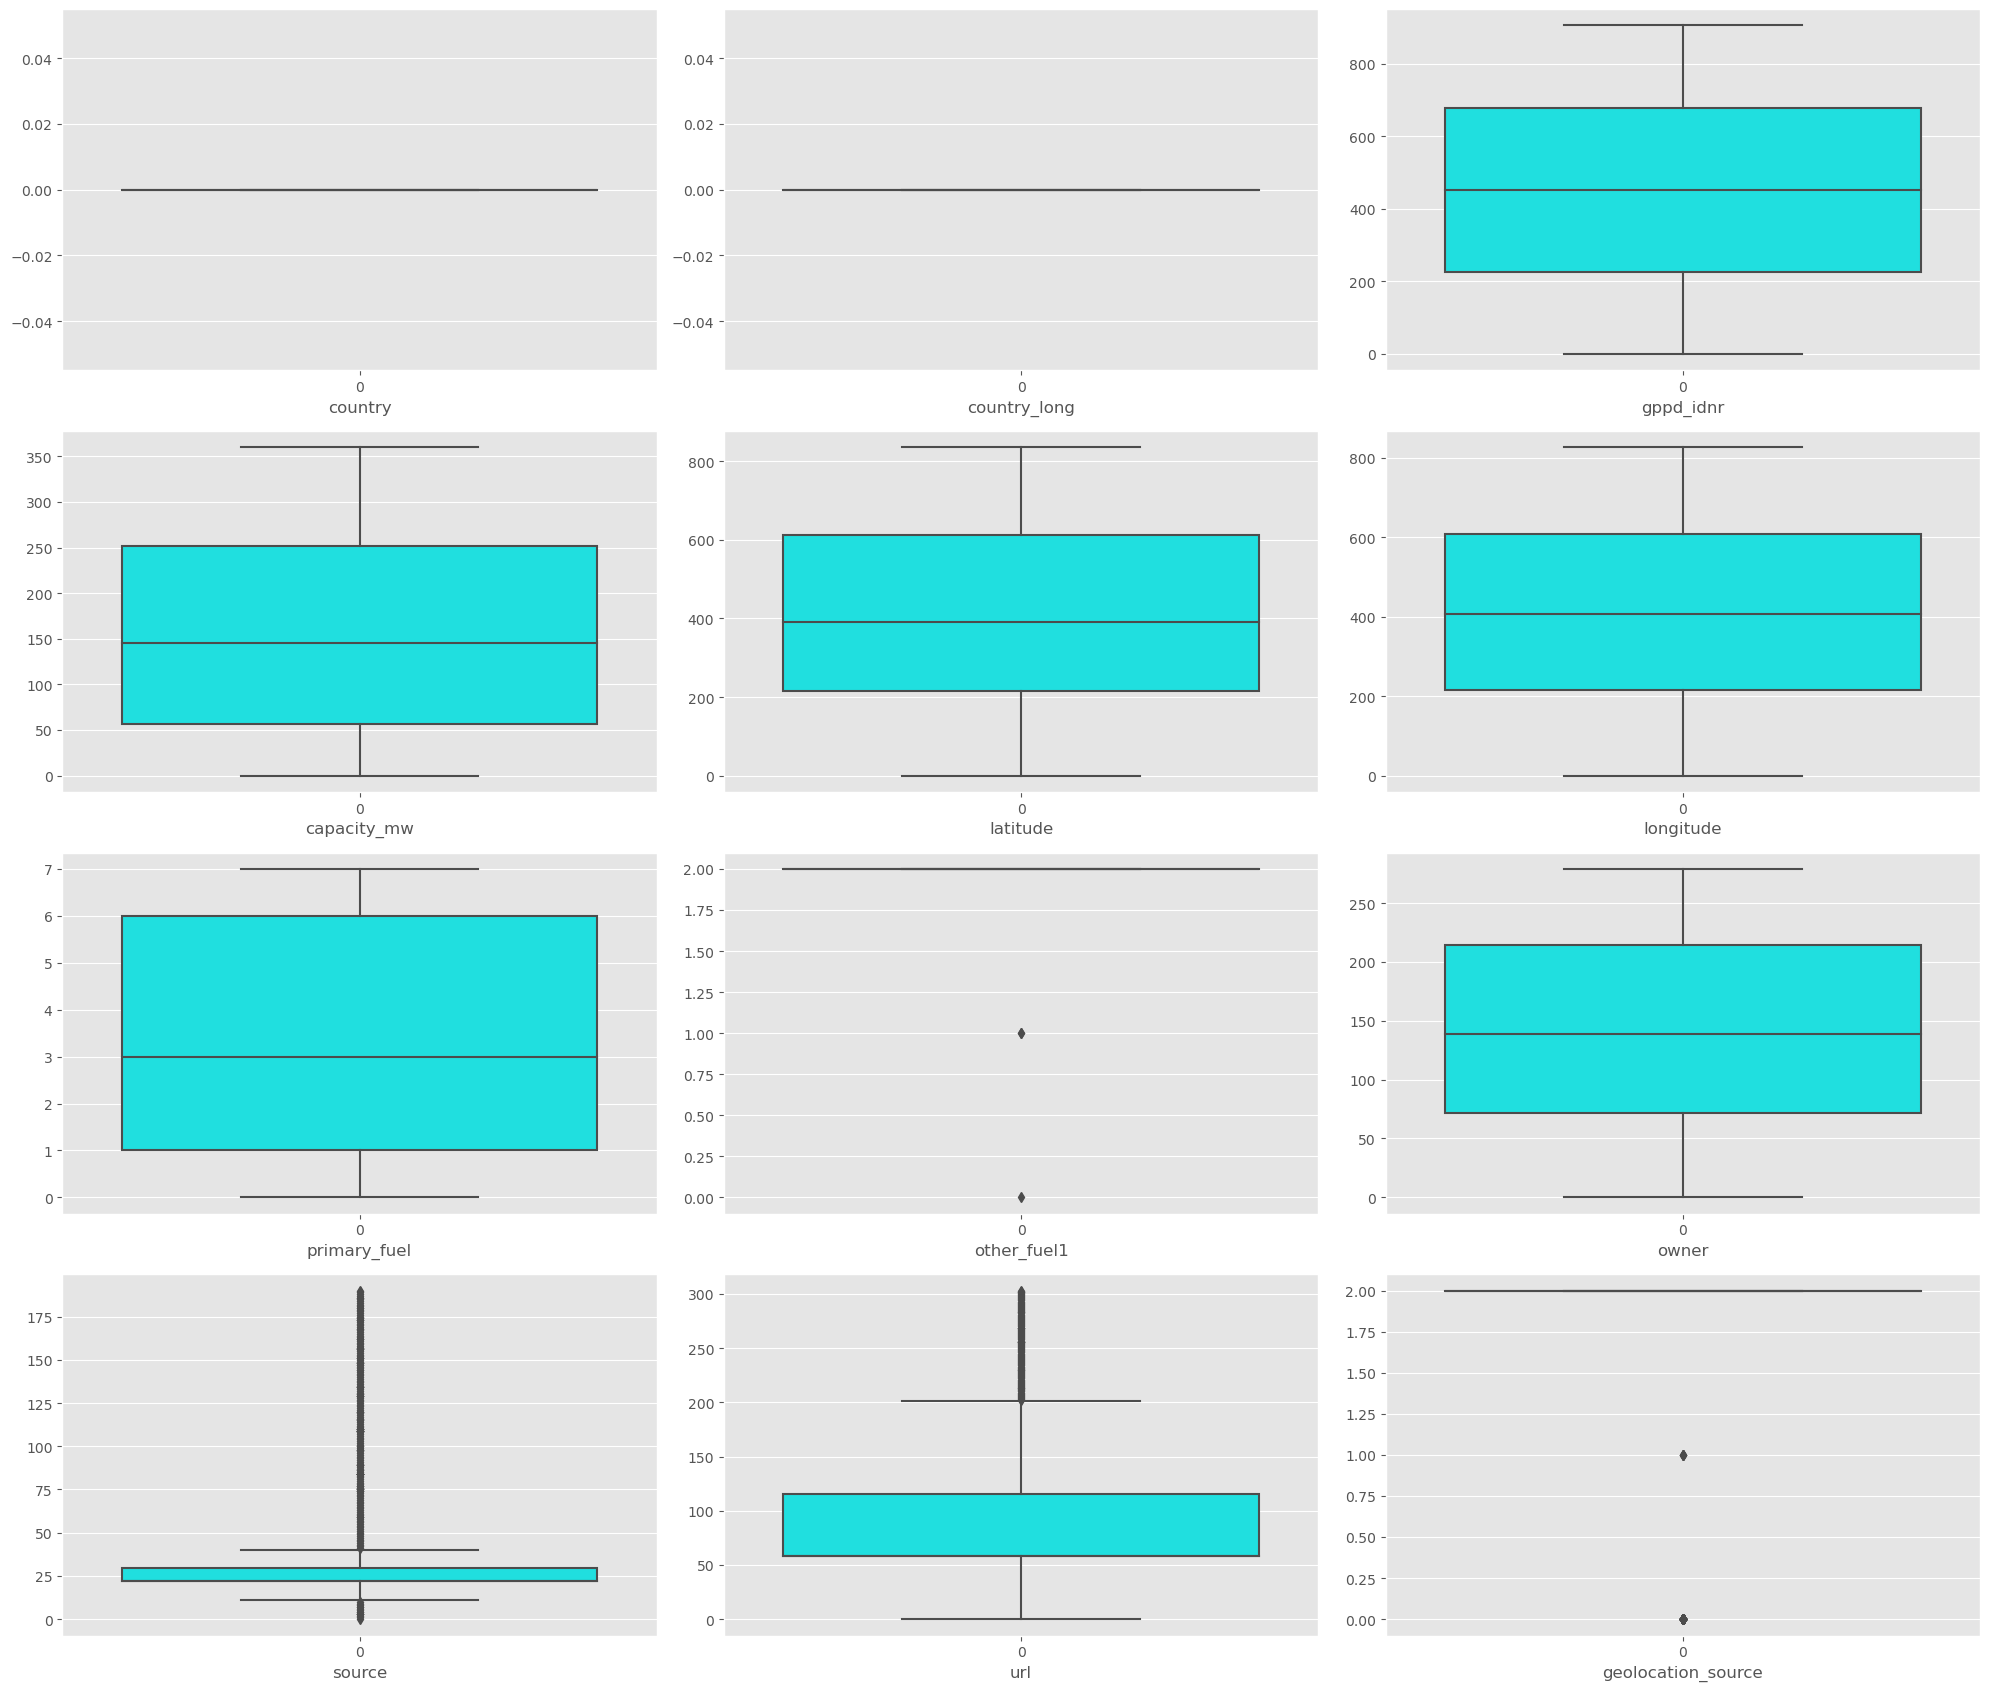

In [82]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- Outliers are present in this dataset.
- Outlier have to removed before building a model.

In [83]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [84]:
df2=df.copy

In [85]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

country                  0.00
country_long             0.00
gppd_idnr              770.10
capacity_mw            292.00
latitude               703.10
longitude              692.10
primary_fuel             6.00
other_fuel1              2.00
owner                  236.00
url                    179.10
generation_gwh_2014    312.55
generation_gwh_2015    333.95
generation_gwh_2016    338.15
generation_gwh_2017    341.25
generation_gwh_2018    343.20
Power_plant_age         39.00
dtype: float64


In [86]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(907, 16)


## Data Loss

In [87]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


## Correlation matrix

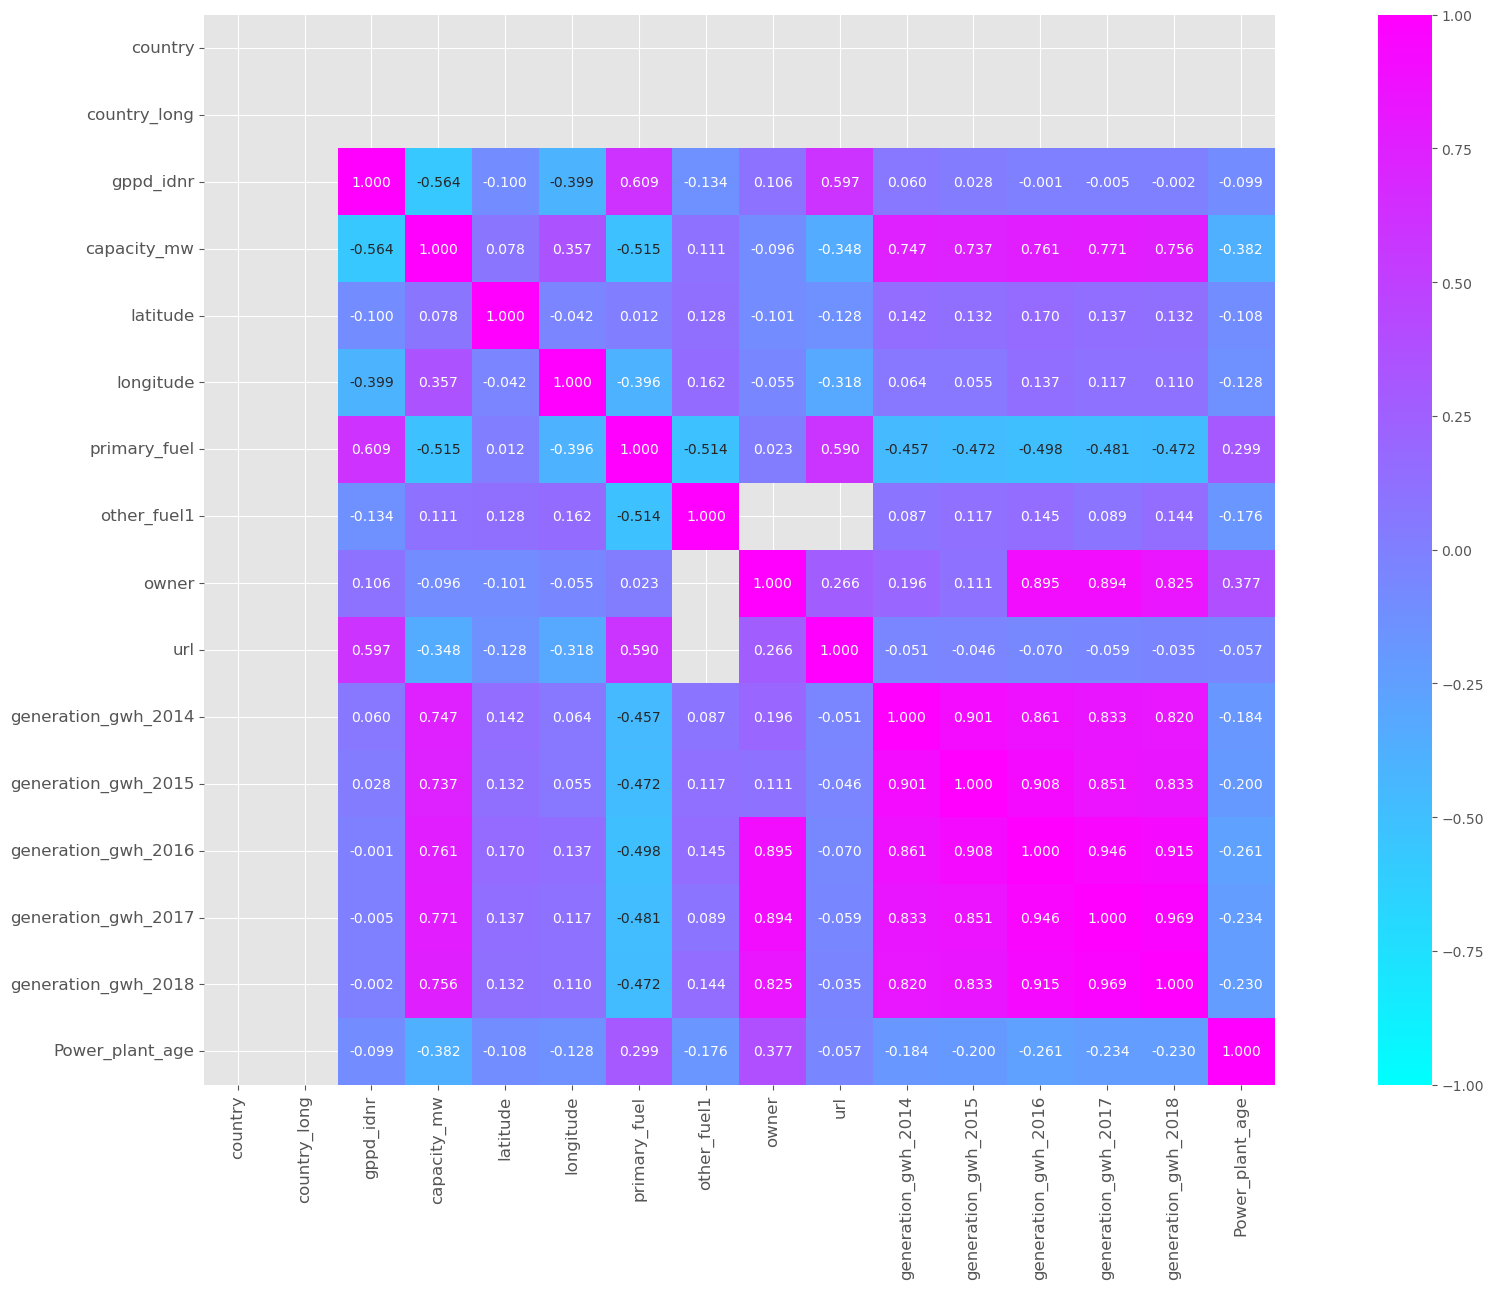

In [88]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

capacity_mw is highly correlated with generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018.

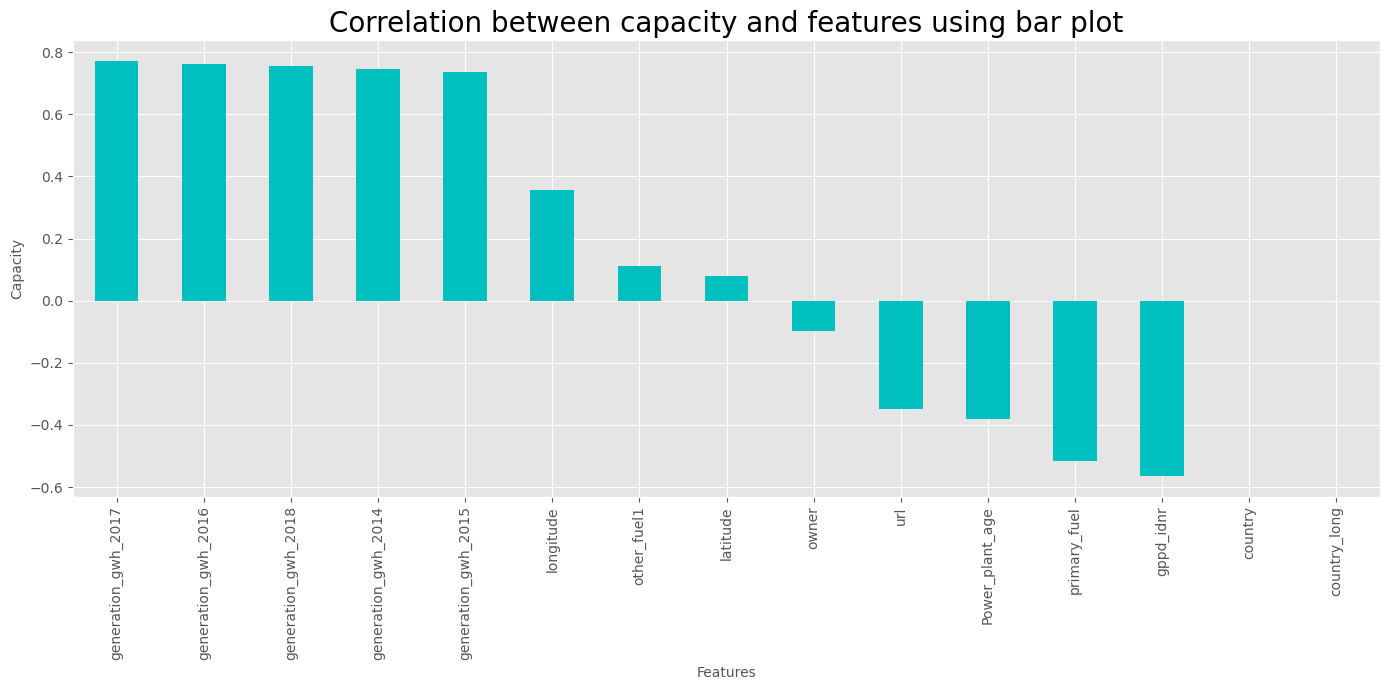

In [89]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

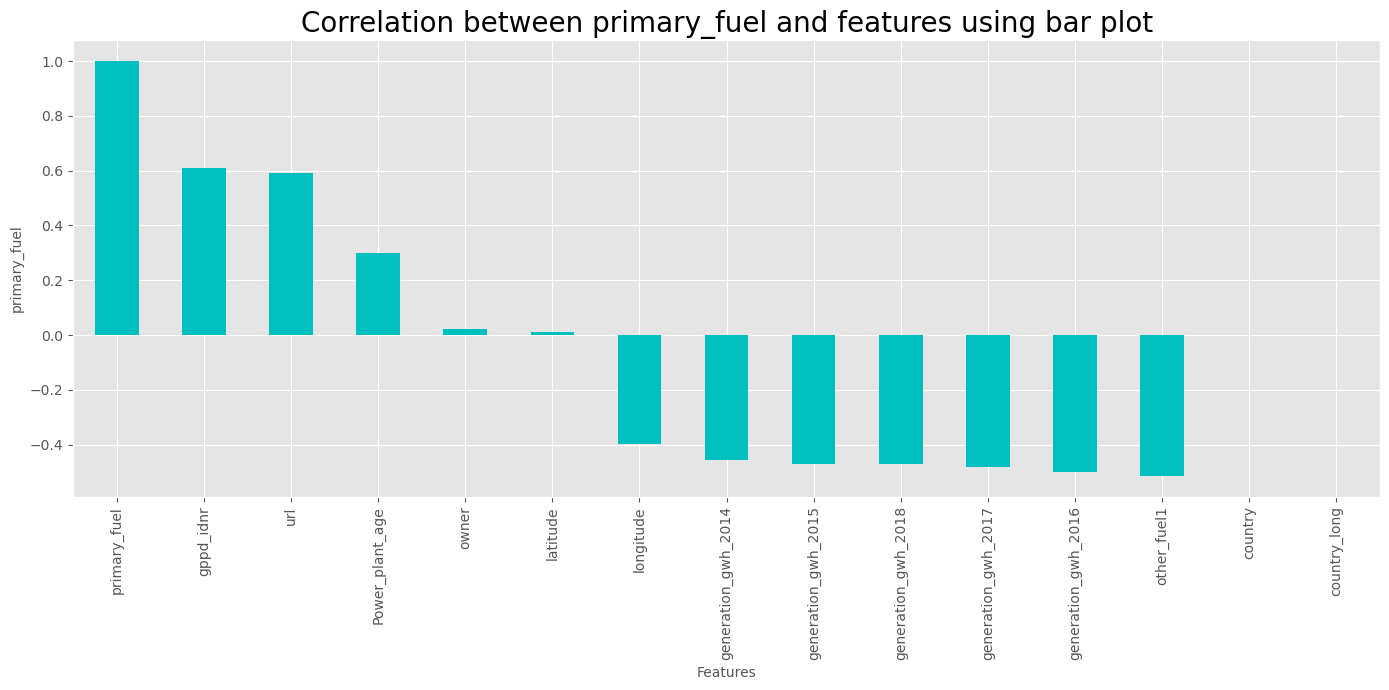

In [90]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [91]:
data.skew()

country                0.000000
country_long           0.000000
gppd_idnr              0.000000
capacity_mw            0.240003
latitude               0.038667
longitude              0.016482
primary_fuel           0.472251
other_fuel1           -9.490933
owner                 -0.029717
url                    1.510537
generation_gwh_2014    0.046120
generation_gwh_2015    0.039006
generation_gwh_2016    0.032778
generation_gwh_2017    0.045145
generation_gwh_2018    0.052102
Power_plant_age        0.953539
dtype: float64

In [92]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [93]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.138327,NaN,NaN,NaN,NaN,NaN,NaN,-0.776224
1,-0.679306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.069184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.541094,NaN,0.037794,0.236659,0.228836,0.080023,0.090396,-0.145176
4,1.182668,0.124035,0.863616,1.207313,1.223275,1.087386,1.253257,-1.353782


In [94]:
# checking skewness after using yeo-johnson
data.skew()

country                0.000000
country_long           0.000000
gppd_idnr              0.000000
capacity_mw            0.240003
latitude               0.038667
longitude             -0.272942
primary_fuel           0.472251
other_fuel1           -7.998949
owner                 -0.029717
url                    1.510537
generation_gwh_2014   -0.434588
generation_gwh_2015   -0.428840
generation_gwh_2016   -0.447954
generation_gwh_2017   -0.450215
generation_gwh_2018   -0.474598
Power_plant_age       -0.077028
dtype: float64

In [95]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [96]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

data['owner'] = data['owner'].fillna(data['owner'].mean())

data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

## Now we have done EDA so,its time for removal of missing data

In [97]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

## Machine Learning Model Building Classification

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [99]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data["primary_fuel"]

In [100]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (634, 9)
Training target vector size: (634,)
Test feature matrix size: (273, 9)
Test target vector size: (273,)


## Finding best Random state

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8058608058608059 on Random_state 773


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7289377289377289


Confusion matrix of Logistics Regression : 
 [[ 7  0  0  3  0  0  1  1]
 [ 1 55  0 10  0  0  3  1]
 [ 1  7  0  9  0  0  0  2]
 [ 1 15  1 60  0  0  1  0]
 [ 0  0  0  1  0  0  0  1]
 [ 1  3  0  5  0  0  0  0]
 [ 2  2  0  0  0  0 46  2]
 [ 0  0  0  0  0  0  0 31]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        12
         1.0       0.67      0.79      0.72        70
         2.0       0.00      0.00      0.00        19
         3.0       0.68      0.77      0.72        78
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         9
         6.0       0.90      0.88      0.89        52
         7.0       0.82      1.00      0.90        31

    accuracy                           0.73       273
   macro avg       0.45      0.50      0.47       

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.7619047619047619


Confusion matrix of DecisionTreeClassifier : 
 [[ 7  3  1  1  0  0  0  0]
 [ 3 53  8  4  0  2  0  0]
 [ 0  8  4  6  0  1  0  0]
 [ 0  9  5 60  3  1  0  0]
 [ 0  0  0  1  0  0  0  1]
 [ 0  0  2  4  0  3  0  0]
 [ 0  1  0  0  0  0 50  1]
 [ 0  0  0  0  0  0  0 31]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

         0.0       0.70      0.58      0.64        12
         1.0       0.72      0.76      0.74        70
         2.0       0.20      0.21      0.21        19
         3.0       0.79      0.77      0.78        78
         4.0       0.00      0.00      0.00         2
         5.0       0.43      0.33      0.38         9
         6.0       1.00      0.96      0.98        52
         7.0       0.94      1.00      0.97        31

    accuracy                           0.76       273
   macro avg       0.60      0.58      0.5

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8205128205128205


Confusion matrix of RandomForestClassifier : 
 [[ 6  5  0  1  0  0  0  0]
 [ 1 57  3  8  0  1  0  0]
 [ 0  6  6  7  0  0  0  0]
 [ 0  4  2 72  0  0  0  0]
 [ 0  0  0  1  0  0  0  1]
 [ 0  0  1  6  0  2  0  0]
 [ 0  1  0  0  0  0 50  1]
 [ 0  0  0  0  0  0  0 31]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

         0.0       0.86      0.50      0.63        12
         1.0       0.78      0.81      0.80        70
         2.0       0.50      0.32      0.39        19
         3.0       0.76      0.92      0.83        78
         4.0       0.00      0.00      0.00         2
         5.0       0.67      0.22      0.33         9
         6.0       1.00      0.96      0.98        52
         7.0       0.94      1.00      0.97        31

    accuracy                           0.82       273
   macro avg       0.69      0.59      0.6

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.8205128205128205


Confusion matrix of ExtraTreesClassifier : 
 [[ 7  4  0  1  0  0  0  0]
 [ 2 54  3 10  0  1  0  0]
 [ 0  5  7  6  0  0  0  1]
 [ 0  5  2 71  0  0  0  0]
 [ 0  0  0  1  0  0  0  1]
 [ 0  0  1  5  0  3  0  0]
 [ 0  0  0  0  0  0 51  1]
 [ 0  0  0  0  0  0  0 31]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

         0.0       0.78      0.58      0.67        12
         1.0       0.79      0.77      0.78        70
         2.0       0.54      0.37      0.44        19
         3.0       0.76      0.91      0.83        78
         4.0       0.00      0.00      0.00         2
         5.0       0.75      0.33      0.46         9
         6.0       1.00      0.98      0.99        52
         7.0       0.91      1.00      0.95        31

    accuracy                           0.82       273
   macro avg       0.69      0.62      0.64       

## Crossvalidation

In [107]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.74725275 0.72527473 0.78453039 0.71270718 0.74033149]
Mean Score : 0.7420193066601907
Std deviation : 0.024400865510863658




Cross Validation Score DecisionTreeClassifier() :

Score : [0.73626374 0.74175824 0.84530387 0.79558011 0.68508287]
Mean Score : 0.7607977657701415
Std deviation : 0.05486029492163132




Cross Validation Score RandomForestClassifier() :

Score : [0.84065934 0.84615385 0.91712707 0.81767956 0.83425414]
Mean Score : 0.85117479205877
Std deviation : 0.03433286142647145




Cross Validation Score ExtraTreesClassifier() :

Score : [0.82417582 0.82967033 0.87292818 0.82872928 0.81767956]
Mean Score : 0.8346366340841479
Std deviation : 0.019610069898022747




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

## Hyper Parameter Tuning : GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [110]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [111]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 25}

## Final Regression Model

In [112]:
Final_mod =  RandomForestClassifier(n_estimators=60 ,criterion = 'gini', max_depth= 20, max_features = 'log2',
             bootstrap = True)

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print("Mean Absolute error :", mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

 Error in Final Model :
Mean Absolute error : 0.315018315018315
Mean squared error : 0.5860805860805861
Root Mean Squared Error: 0.7655590023509528
 R2 Score of Final Model :
0.8830935251798562




 True Values Vs Predicted Value plot :


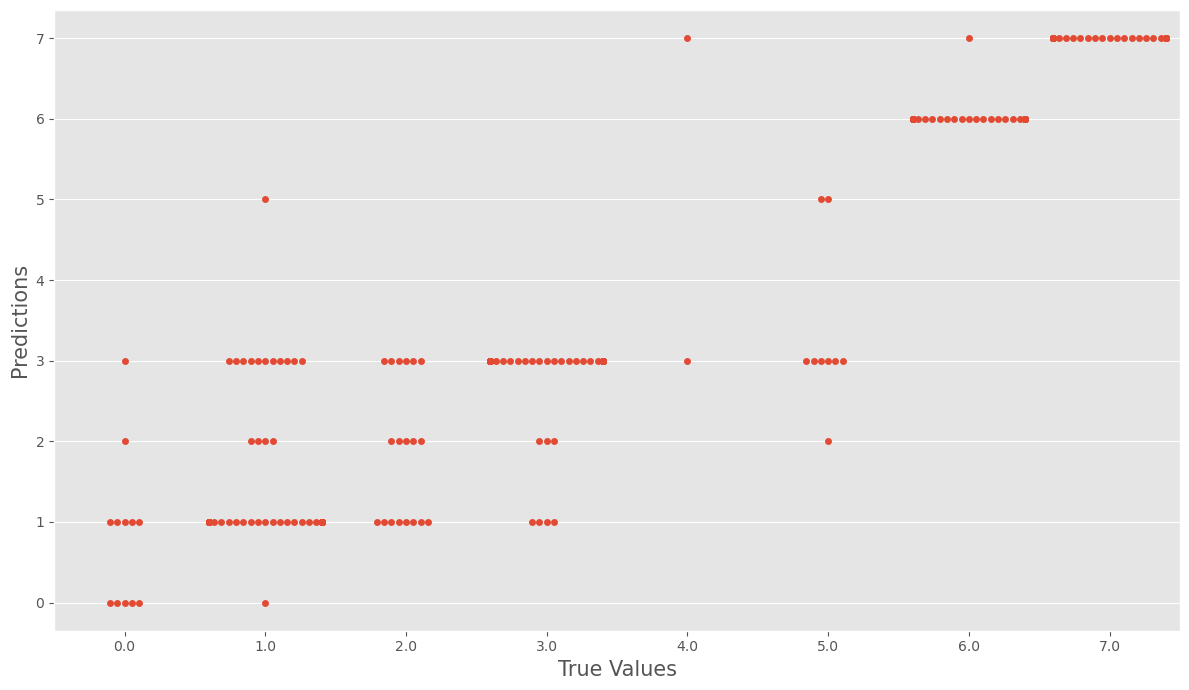

In [115]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x = Y_test.round(2), y= y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Saving Model

In [117]:
import pickle
filename='GlobalPowerPlant.pkl'
pickle.dump(Final_mod,open(filename,'wb'))

In [118]:
loaded_model=pickle.load(open('GlobalPowerPlant.pkl','rb'))
result=loaded_model.score(X_test,Y_test)

In [119]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
Predicted,1.0,1.0,3.0,3.0,2.0,1.0,1.0,6.0,3.0,1.0,...,7.0,3.0,3.0,7.0,1.0,1.0,3.0,1.0,1.0,6.0
Original,1.0,1.0,1.0,3.0,3.0,1.0,1.0,6.0,2.0,1.0,...,7.0,3.0,5.0,7.0,1.0,1.0,3.0,1.0,2.0,6.0
